<h2>Autor: Matija Žnidarić</h2>

<h1>Naslov Zadatka: Zadatak umjesto projekta</h1>

#Link na Google colab: https://colab.research.google.com/drive/1B3MsqHkxxTvf08333_zZYylOP7CDoAJC?usp=sharing

#Uvod

U ovom projektu koristimo Python u obradi podataka i web operacijam, započelo sam projekt koji koristi biblioteke poput requests za web zahtjeve, BeautifulSoup za parsiranje HTML sadržaja i urllib.parse za upravljanje URL-ovima. Ovaj projekta je usmjerenog na automatizaciju procesa dohvaćanja i obrade podataka s raznih web izvora. Cilj projekta je razviti učinkovit alat koji može navigirati, izvlačiti i obrađivati web podatke.



#Metode i tehnike rada

Metode i Tehnike rada
U okviru ovog projekta, primijenjene su različite metode i tehnike kako bi se osigurala efikasnost, točnost i pouzdanost podataka. Metode koje se koriste su:

1. Web Scraping: Korištenjem biblioteke **BeautifulSoup**, implementirana je tehnika web scrapinga koja omogućava ekstrakciju podataka iz HTML struktura web stranica. Ova metoda je neophodna za prikupljanje relevantnih podataka sa raznih web izvora.

2. Upravljanje URL-ovima: Za upravljanje i manipulaciju URL-ova, korištena je biblioteka **urllib.parse.** Ova tehnika osigurava efikasno rukovanje web linkovima, što je ključno za pristupanje različitim web stranicama i resursima.

3. HTTP Zahtjevi: Za slanje i primanje HTTP zahtjeva koristili smo biblioteku **requests.** Ovo je fundamentalno za dohvat web sadržaja, omogućavajući projektu da komunicira s web serverima i preuzima potrebne podatke.

4. Obrada i Analiza Podataka: Nakon prikupljanja podataka, slijedi njihova obrada i analiza. Ova faza uključuje čišćenje podataka, njihovo strukturiranje u pogodne formate te primjenu različitih analitičkih tehnika za izvlačenje korisnih informacija.

5. Automatizacija Procesa: Kroz cijeli projekt, velika pažnja posvećena je automatizaciji procesa. Cilj je minimizirati ručni rad i povećati efikasnost procesa prikupljanja i obrade podataka.



In [ ]:
!pip install pdfminer.six
!pip install pytesseract
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.3 MB/s eta 0:00:00


## Opis Implementacije
U ovo djelu implementiran je dio koda koji služi za preuzimanje PDF i spremanje datoteka sa stranice FOI-a.

**Funkcija preuzmi_datoteku(url, putanja_za_spremanje)**:
Ovu funkciju koristimo za preuzimanje datoteka s zadanog URL-a. HTTP zahtjev se šalje pomoću requests.get. Kad nam je vraćen kod 200 tad je zahtjev uspješno poslan. Ime datoteke izdvaja se iz URL-a, a zatim se stvara puna putanja za spremanje datoteke.

**Funkcija preuzmi_pdf_datoteke_sa_stranice(url, putanja_za_spremanje)**:
Ova funkcija pretražuje stranicu za PDF linkove. Pronalazi sve linkove unutar stranice koji završavaju s .pdf. Svaki pronađeni PDF link se kombinira s početnim URL-om  pomoću urljoin i preuzima koristeći funkciju preuzmi_datoteku.

**Funkcija preuzmi_linkove(base_url, parametri, max_stranica, putanja_za_spremanje)**:
Ova funkcija prolazi kroz sve web stranice na zadanoj stranici. Na svakoj stranici skripta dohvaća sadržaj i pretražuje linkove pomoću BeutifulSoup-a. Ako link vodi do stranice PDF dokumenta aktivira se funkcija Preuzmi PDF datoteke s stranice





In [ ]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import os

def preuzmi_datoteku(url, putanja_spremi):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        ime_datoteke = os.path.basename(url)
        puna_putanja = os.path.join(putanja_spremi, ime_datoteke)

        if not os.path.exists(putanja_spremi):
            os.makedirs(putanja_spremi)

        with open(puna_putanja, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                if chunk:
                    f.write(chunk)

def preuzmi_pdf_datoteke_sa_stranice(url, putanja_spremi):
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        for link in soup.find_all('a', href=True):
            if link['href'].endswith('.pdf'):
                pdf_url = urljoin(url, link['href'])
                preuzmi_datoteku(pdf_url, putanja_spremi)

def preuzmi_linkove(base_url, parametri, max_stranica, putanja_spremi):
    trenutna_stranica = 0
    while trenutna_stranica < max_stranica:
        url = f"{base_url}?page={trenutna_stranica}&{parametri}"
        response = requests.get(url)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            for link in soup.find_all('a', href=True):
                full_link = urljoin(base_url, link['href'])
                if full_link.startswith('https://www.foi.unizg.hr/hr/dokument/'):
                    preuzmi_pdf_datoteke_sa_stranice(full_link, putanja_spremi)

        trenutna_stranica += 1

base_url = 'https://www.foi.unizg.hr/hr/search/site'
parametri = 'f%5B0%5D=bundle%3Adokumenti'
max_stranica = 4
putanja_spremi = '/content/pdf'

preuzmi_linkove(base_url, parametri, max_stranica, putanja_spremi)

##Opis implementacije
Ovaj dio koda služi za brisanje prije peuzetih datoteka.Ako postoji, brišu se sve PDF datoteke unutar PDF mape
.

In [ ]:
import os

putanja = '/content/pdf'

if os.path.exists(putanja):
    for datoteka in os.listdir(putanja):
        putanja_datoteke = os.path.join(putanja, datoteka)
        if os.path.isfile(putanja_datoteke):
            os.remove(putanja_datoteke)
    print("Sve datoteke su uspješno izbrisane.")
else:
    print("Direktorij ne postoji.")

Sve datoteke su uspješno izbrisane.


##Opis implementacije
U ovom djelu koda kreira  se baza podataka pomoću sqllite3. Spaja se na bazu, i kreira se tablica u bazi dokument.db, sprema se i zatvara konekcija.

In [ ]:
import sqlite3

conn = sqlite3.connect('dokumenti.db')

cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS dokument (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    naslov TEXT,
    putanja TEXT,
    url TEXT,
    datum TEXT,
    sadrzaj TEXT
)
''')

conn.commit()
conn.close()

##Opis implementacije
Ovaj dio koda obavlja ekstrakciju teksta iz PDF datoteka i pohranjuje te informacije u SQLite bazu podataka. Funkciju **tekst_iz_pdfa** koristimo za ekstrakciju teksta iz pdf dokumenata. Drugu funkciju **spremi_u_bazu** koristimo za spremanje podataka u bazu dokumenti.db

In [ ]:
from pdfminer.high_level import extract_text
import pytesseract
from datetime import datetime
from PIL import Image, UnidentifiedImageError
import os

def tekst_iz_pdfa(putanja_pdf):
    tekst = extract_text(putanja_pdf)
    if not tekst or tekst.isspace():
        try:
            slika_pdf = Image.open(putanja_pdf)
            tekst = pytesseract.image_to_string(slika_pdf)
        except UnidentifiedImageError as e:
            print(f"Greška pri obradi slike: {e}")
            tekst = "Greška pri obradi slike"
        except Exception as e:
            print(f"Greška pri OCR obradi: {e}")
            tekst = "Greška pri OCR obradi"
    return tekst

def spremi_u_bazu(naslov, putanja, url, datum, sadrzaj):
    conn = sqlite3.connect('dokumenti.db')
    cursor = conn.cursor()
    cursor.execute('''
    INSERT INTO dokument (naslov, putanja, url, datum, sadrzaj)
    VALUES (?, ?, ?, ?, ?)
    ''', (naslov, putanja, url, datum, sadrzaj))
    conn.commit()
    conn.close()

conn = sqlite3.connect('dokumenti.db')
cursor = conn.cursor()
cursor.execute('DROP TABLE IF EXISTS dokument')
cursor.execute('''
CREATE TABLE dokument (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    naslov TEXT,
    putanja TEXT,
    url TEXT,
    datum TEXT,
    sadrzaj TEXT
)
''')
conn.commit()
conn.close()

putanja_za_spremanje = '/content/pdf'
url_osnova = 'https://www.foi.unizg.hr/sites/default/files/'

for datoteka in os.listdir(putanja_za_spremanje):
    if datoteka.endswith('.pdf'):
        puna_putanja = os.path.join(putanja_za_spremanje, datoteka)
        tekst = tekst_iz_pdfa(puna_putanja)
        datum = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        url = urljoin(url_osnova, datoteka)
        spremi_u_bazu(datoteka, puna_putanja, url, datum, tekst)

Greška pri obradi slike: cannot identify image file '/content/pdf/odluka-izvanredni_izbori_za_studentski_zbor-sijecanj_2024.pdf'
Greška pri obradi slike: cannot identify image file '/content/pdf/popis_gs_u_sukobu_interesa_2023.pdf'
Greška pri obradi slike: cannot identify image file '/content/pdf/odluka-eticko_povjerenstvo_foi-2020.pdf'
Greška pri obradi slike: cannot identify image file '/content/pdf/odluka-podnosenje_zamolbi_za_ispis_s_fakulteta.pdf'


#Prikaz rada aplikacije
Na ovoj slici je prikazana baza podataka sa pdf dokumentima sa prve 4 stranice dokumenata.

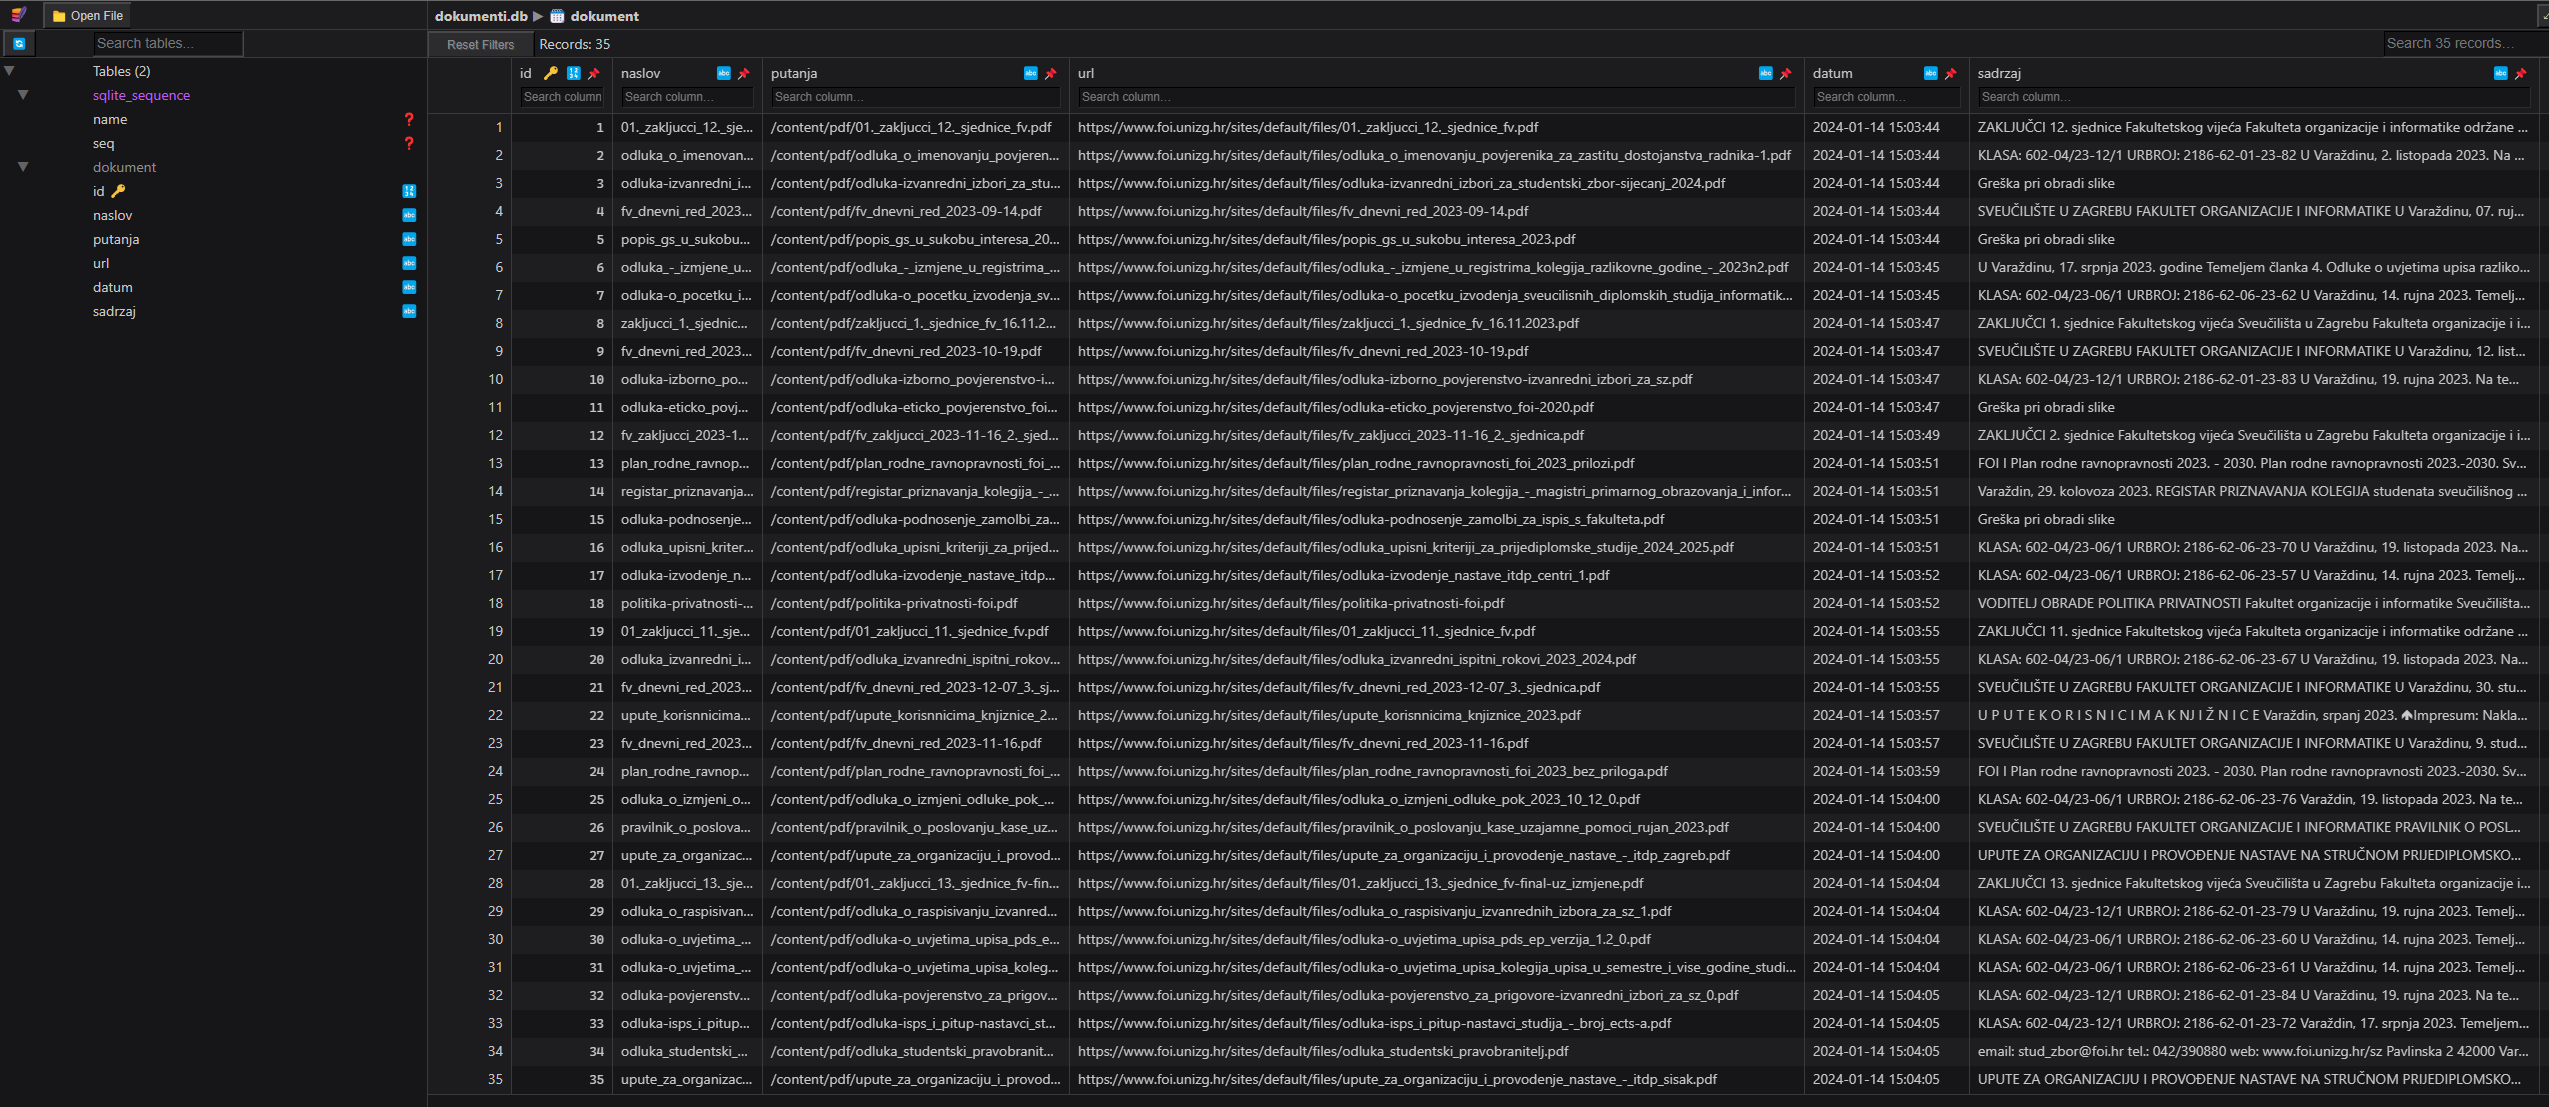

Ova slika prikazuje mapu sa preuzetim datotekama.


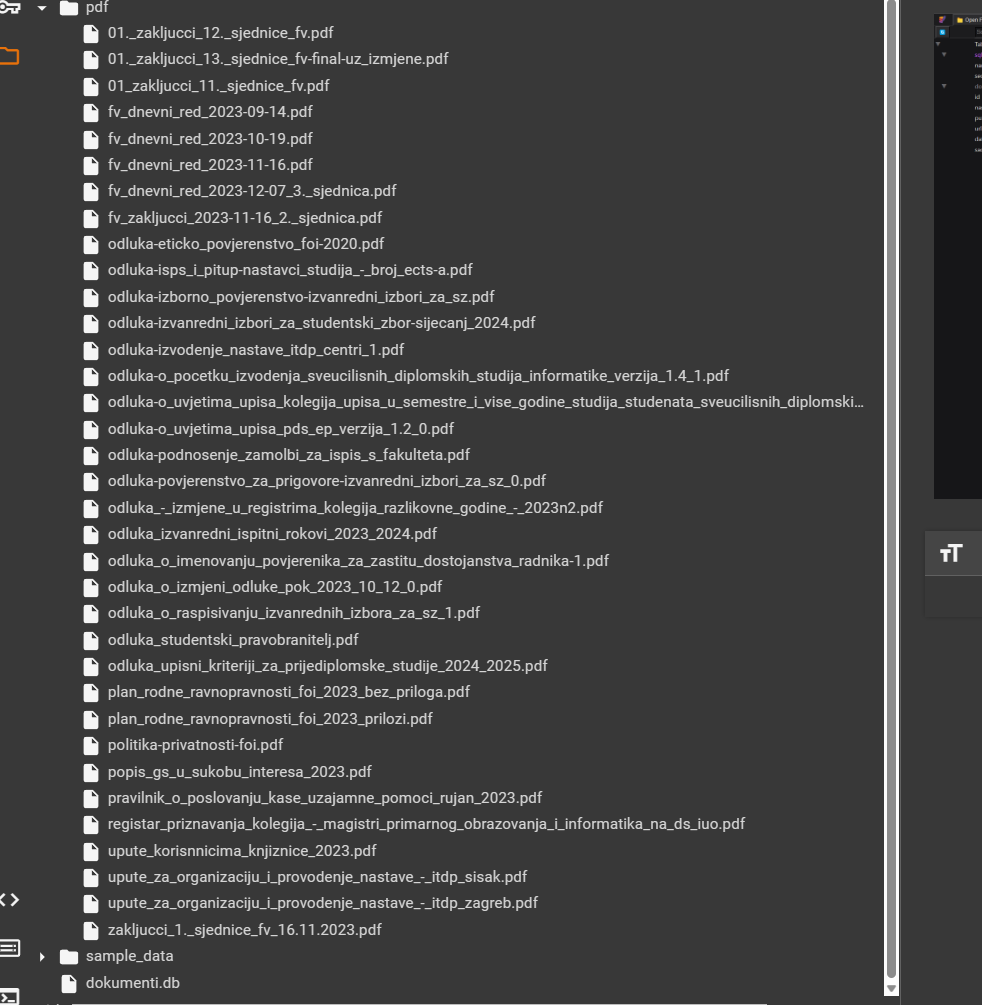

#Kritički osvrt
Mislim da je ovaj projekt izazovan, ali izvediv, idealan za razvijanje programerskih vještina. Njegova kompleksnost potiče na dublje razumijevanje materije, dok modularni pristup omogućava postepeno rješavanje problema i olakšava implementaciju. Projekt nudi praktičnu primjenu teorijskih znanja i prostor za daljnje učenje i razvoj.

#Zaključak
Ovaj projekt je izazovan poduhvat koji uspješno spaja teorijska znanja i praktične vještine. Iako zahtjevan, projekt pruža studentima priliku da se suoče s realnim programerskim izazovima, potičući istovremeno na kontinuirano učenje i osobni razvoj.

#Literatura
1. "[PzAP] Network analysis and visualization.ipynb", Google colab, [Online]. Dostupno na:
https://colab.research.google.com/drive/1BHFiz7pDWzbJq8BMcSpzFlJ14qagEZ27?usp=sharing
[Pristupljeno: 14.01.2024.]
2. "[PzAP] Data Retrieval, Storage, and File Types", Google colab, [Online]. Dostupno na:
https://colab.research.google.com/drive/1jTi6TEq4i1OtKgZYaYu8jN-VFSj3eBoA?usp=sharing
[Pristupljeno: 14.01.2024.]
3. "[PzAP] Applied (Engineering) Concepts in Data Analytics - shared.ipynb", Google colab, [Online]. Dostupno na:
https://colab.research.google.com/drive/10tWVfRrx7TdnmAvEnX-WZHR2hG_QrBSF?usp=sharing
[Pristupljeno: 14.01.2024.]
4. "Beautiful Soup: Build a Web Scraper With Python", realpython.com, [Online]. Dostupno na: https://realpython.com/beautiful-soup-web-scraper-python/ [Pristupljeno: 14.01.2024.]
5. "SQLite-Commands", tutorialspoint, [Online]. Dostupno na: https://www.tutorialspoint.com/sqlite/sqlite_commands.htm [Pristupljeno: 14.01.2024.]
6."ChatGPT", ChatGPT, [Online]. Dostupno na: chat.openai.com [Pristupljeno: 14.01.2024.]
